# DS 3000 HW 2

Due: Sun Feb 13 @ 11:59 PM EST

### Submission Instructions
Submit this `ipynb` file to [gradescope](https://www.gradescope.com/courses/337250).  To ensure that your submitted `ipynb` file represents your latest code, make sure to give a fresh `Kernel > Restart & Run All` just before uploading the `ipynb` file to gradescope.

### Tips for success
- Start early
- Make use of [Piazza](https://course.ccs.neu.edu/ds3000/admin.html#piazza-discussion-forum)
- Make use of [Office Hours](https://course.ccs.neu.edu/ds3000/office_hours.html)
    - Office Hours will start Jan 26, I"ll send an announcement that day and instructions will be complete on the course website
- Remember that [Documentation / style counts for credit](https://course.ccs.neu.edu/ds3000/style_guide.html)
- Under no circumstances may one student view or share their ungraded homework or quiz with another student [(see also)](https://course.ccs.neu.edu/ds3000/syllabus.html#academic-integrity-and-conduct)

# Plotting Functions

## Part 1: Plotting Warm Up (18 points)
Plot each of the functions below over 100 evenly spaced points in the domain $[0, 10]$. 

Be sure to use the line specifications given below:

| Name       | Value                       | Color | Line Width     | Style  |
|------------|-----------------------------|-------|----------------|--------|
| sinusoid   | 3 * sin (2/3 x)             | Red   | 4              | dotted |
| polynomial | (x-3) (x - 2) (x-8) / 10    | Blue  | 2              | solid  |
| abs value  | min(abs(x - 3), abs(x - 8)) | Green | 3              | dashed |

- add a legend which specifies the name of each function
- use seaborn's `sns.set()` before plotting to make the graph look nice
- Make sure that the axes are labeled `x` and `f(x)`
- You may find the arithmetic functions needed in numpy (sin, abs, minimum)

## Part 1: Solution

Text(0, 0.5, 'f(x)')

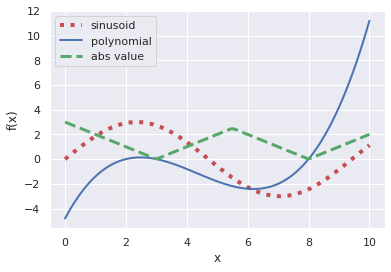

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()

x = np.linspace(-0, 10, 100)
func_dict = {'sinusoid': 3 * np.sin(2 / 3 * x),
             'polynomial': (x-3) * (x - 2) * (x - 8) / 10 ,
             'abs value': np.minimum(np.abs(x - 3), np.abs(x- 8))}

color_dict = {'sinusoid': 'r',
              'polynomial': 'b',
              'abs value': 'g'}

width_dict = {'sinusoid': 4,
              'polynomial': 2,
              'abs value': 3}

style_dict = {'sinusoid': ':',
              'polynomial': '-',
              'abs value': '--'}

for label, y in func_dict.items():
    plt.plot(x, y, label=label, 
             color=color_dict[label],
             linewidth=width_dict[label],
             linestyle=style_dict[label])
plt.legend()
plt.xlabel('x')
plt.ylabel('f(x)')

## Part 2.1 Solution:

# Part 2: Bike Data

## Part 2.1: DataFrame Construction (10 points)
Recreate the following table of bicycle race data as a dataframe (do not write a csv and read it in to accomplish this).  Use the `Bike ID` as the index column and save the resulting dataframe as a csv (you need not submit this csv, but be sure to include the `DataFrame.to_csv()` command in your submission).

| Bike ID | Rider ID | Make      | Color      | Bike Type  | Weight (g) | Time Trial 1 (s) | Time Trial 2 (s) |
|---------|----------|-----------|------------|------------|------------|------------------|------------------|
| 037     | 3        | Bianchi   | Celeste    | Road       | 8200       | 450              | 205              |
| 379     | 1        | Duratec   | \<no paint>| Cyclocross | 9500       | 510              | 222              |
| 398     | 7        | Trek      | Red        | Road       | 9000       | 432              | 211              |
| 37B     | 3        | Trek      | Black      | Mountain   | 13607      | 561              | 301              |
| BRG     | 7        | Canondale | Black      | Mountain   | 15005      | 524              | 299              |

In [11]:
import pandas as pd

bike_id = ['037', '379', '398', '37B', 'BRG']
bike_dict = {'Rider ID': [3, 1, 7, 3, 7],
             'Make': ['Bianchi', 'Duratec', 'Trek', 'Trek', 'Canondale'],
             'Color': ['Celeste', '<no paint>', 'Red', 'Black', 'Black'],
             'Bike Type': ['Road', 'Cyclocross', 'Road', 'Mountain', 'Mountain'],
             'Weight (g)': [8200, 9500, 9000, 13607, 15005],
             'Time Trial 1 (s)': [450, 510, 432, 561, 524],
             'Time Trial 2 (s)': [205, 222, 211, 301, 299]}

df_bike_race = pd.DataFrame(bike_dict, index=bike_id)

df_bike_race.to_csv('bike_race.csv')
df_bike_race

,Rider ID,Make,Color,Bike Type,Weight (g),Time Trial 1 (s),Time Trial 2 (s)
037,3,Bianchi,Celeste,Road,8200,450,205
379,1,Duratec,<no paint>,Cyclocross,9500,510,222
398,7,Trek,Red,Road,9000,432,211
37B,3,Trek,Black,Mountain,13607,561,301
BRG,7,Canondale,Black,Mountain,15005,524,299


## Part 2.2: Manipulating DataFrames (21 points: 7pt each)
For each of the questions below:
- Provide a few (1 to 3) code cells which construct a series or dataframe object which is sufficient to answer each question
    - one shouldn't have to look at the full dataframe or otherwise as reference
        - we practice this way as real datasets are too big for this to be easily done!
- Provide a markdown cell which contains a one sentence response to each question
    - In effect, you're interpretting the code cell(s) so one who knows no python can understand how your code answers the question

### Questions:
1. Which `Bike ID` has the greatest weight?
1. Which `Bike ID` has the fastest average time trial?
1. What is the average weight of each bike, per `Bike Type `?  
    - Hint: `groupby()` and/or `.unique()` might be helpful

Note that:
- each time trial records the time taken to complete a given track under similar conditions. 
- some riders (3 and 7) completed the time trials on two distinct bikes, the data is stored in distinct rows

## Part 2.2: Solution

### 1. Which `Bike ID` has the greatest weight?

In [16]:
# get maximum weight across all rows of bikes
max_weight = df_bike_race['Weight (g)'].argmax()
df_bike_race.iloc[max_weight, :]

Rider ID                    7
Make                Canondale
Color                   Black
Bike Type            Mountain
Weight (g)              15005
Time Trial 1 (s)          524
Time Trial 2 (s)          299
Name: BRG, dtype: object

Bike `BRG` has the largest weight (15005 g).

### 2. Which `Bike ID` has the fastest average time trial?

In [22]:
# compute mean time trial per each bike_id
df_time_trial = df_bike_race.loc[:, ('Time Trial 1 (s)', 'Time Trial 2 (s)')]
s_mean_time_trial = df_time_trial.mean(axis=1)
s_mean_time_trial

037    327.5
379    366.0
398    321.5
37B    431.0
BRG    411.5
dtype: float64

In [26]:
# find the bike with minimum mean time trial
idx_bike_fastest = s_mean_time_trial.argmin()
df_bike_race.iloc[idx_bike_fastest, :]

Rider ID               7
Make                Trek
Color                Red
Bike Type           Road
Weight (g)          9000
Time Trial 1 (s)     432
Time Trial 2 (s)     211
Name: 398, dtype: object

Bike `398` has the fastest average time trial (321.5 sec).

### 3. What is the average weight of each bike type, per `Bike Type `? 

In [61]:
# without using groupby ... things are tougher
# get list of all unique bike types
bike_type_list = list(df_bike_race['Bike Type'].unique())


# compute mean weight per bike type
bike_type_weight_dict = dict()
for bike_type in bike_type_list:
    # build dataframe with only a given bike type
    series_type = df_bike_race['Bike Type'] == bike_type
    df = df_bike_race.loc[series_type, :]
    
    # compute / store the mean weight for this bike type
    bike_type_weight_dict[bike_type] = df['Weight (g)'].mean()
    
bike_type_weight_dict

{'Road': 8600.0, 'Cyclocross': 9500.0, 'Mountain': 14306.0}

In [29]:
# compute mean weight per bike type
df_bike_race.groupby('Bike Type').mean()

,Rider ID,Weight (g),Time Trial 1 (s),Time Trial 2 (s)
Bike Type,,,,
Cyclocross,1.0,9500.0,510.0,222.0
Mountain,5.0,14306.0,542.5,300.0
Road,5.0,8600.0,441.0,208.0


On average, road bikes are 8600g, Cyclocross bikes are 9500g and Mountain bikes are 14306g.

# Part 3: IMDB Movie Data

We use an [IMDB](https://www.kaggle.com/stefanoleone992/imdb-extensive-dataset) movie dataset in part 3.  (Link is broken, but kept for proper citation of original source).

## Part 3.1: How long are movies in different genres (15 + 2 points)

To help understand which genres of movies typically have longer runtimes, you'll build [this graph](https://ibb.co/dB1MCCx) that that shows the `duration` of the three `genre`s: `Drama`, `Comedy`, and `Horror`.

Be sure to:
* ensure consistent and appropriate `bins` for all subplots
* title each subplot to distinguish genres
* give the entire figure an informative title
* resize the figure as appropriate
* give the same y axis to all plots via `plt.ylim()`
* label vertical axes on all subplots
* label horizontal axes on lowest subplot
    - all plots share horizontal axis, we need only label it once
* exclude any movies with a multi-genre (e.g. `'Comedy, Horror'`).


**Extra Credit (+2)**:  In a seperate figure repeat the exercise above while including multi-genre movies.  For example, a movie with `genre='Comedy, Horror'` should be included in both the `Comedy` and `Horror` categories.

## Part 3.1: Solution

Text(0.5, 0.98, 'Movie duration across genres')

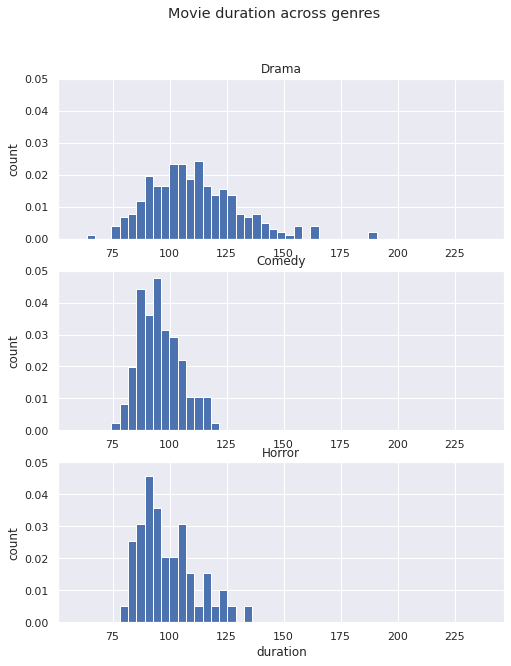

In [52]:
# parameters 
# (writing these at the top of the script allows us to change 
# things easily ... try swapping 'duration' for 'metascore')
feature = 'duration'
genre_list = ['Drama', 'Comedy', 'Horror']

# read in csv
f = 'IMDb_movies_clean.csv'
df_movie = pd.read_csv(f)

# choosing bins as below allows us to easily swap
# feature for another and programmatically get bins
bins = np.linspace(df_movie[feature].min(),
                   df_movie[feature].max(), 50)

# choosing bins as below if fine for full credit too, but less flexible
# bins = np.linspace(60, 170, 30)

for idx, genre in enumerate(genre_list):
    # select only movies of the given genre
    bool_genre = df_movie['genre'] == genre
    df_movie_genre = df_movie.loc[bool_genre, :]
    
    # bonus 
    # https://pandas.pydata.org/docs/reference/api/pandas.Series.str.contains.html
    # bool_genre = df_movie['genre'].str.contains(genre)
    # df_movie_genre = df_movie.loc[bool_genre, :]
    
    # plot histogram
    plt.subplot(3, 1, idx + 1)
    plt.hist(df_movie_genre[feature], 
             density=True, 
             bins=bins)
    
    # clean plot
    plt.ylabel('count')
    plt.gca().set_title(genre)
    plt.ylim(0, .05)
    
# groom entire figure
plt.xlabel(feature)
plt.gcf().set_size_inches((8, 10))
plt.suptitle(f'Movie {feature} across genres')    

## Part 3.2: Does budget predict movie ratings? (15 points)

Does a bigger budget movie tend to get higher viewer scores?  

Build [this scatter plot](https://ibb.co/pwZ4NQg) of `Budget` and `avg_vote` for movies whose genre is either `Drama` or `Comedy`.

Be sure to:
- plot each genre with a unique color
- add a legend per genre
- labels axes and gives title to plot
- uses `alpha` to ensure all dots are visible
- use a logarithmic scale where appropriate

## Part 3.2: Solution

Text(0.5, 1.0, 'Budget and reception across genres')

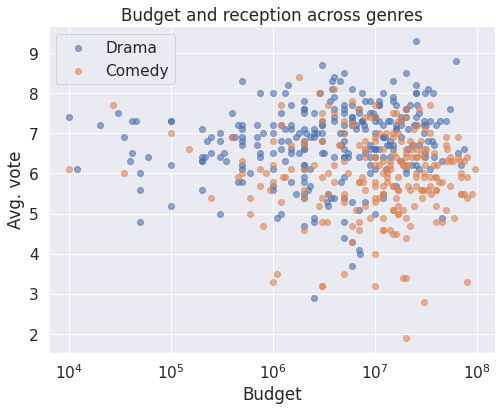

In [66]:
# initialize fig
sns.set(font_scale=1.4)
plt.figure(figsize=(8, 6))

for genre in ['Drama', 'Comedy']:
    # get movies only from given genre
    s_bool = df_movie['genre']==genre
    df_movie_genre = df_movie.loc[s_bool, :]
    
    # scatter them
    plt.scatter(df_movie_genre['budget'], df_movie_genre['avg_vote'], 
        alpha=.6, label=genre)
    
# groom graph
plt.xscale('log')
plt.xlabel('Budget')
plt.ylabel('Avg. vote')
plt.legend()
plt.title('Budget and reception across genres')

### Part 3.3 Interpretting scatterplots (6 points)
In the plot above, `avg vote` is the average viewer vote of how good the movie was (higher values indicate the viewer enjoyed the movie more).

Based on the plot, answer the following questions (and explain how you read that from the plot).
1. Which of the two genres appear to get larger scores from the users?
1. Which of the two genres appear to have larger budgets?
1. Discuss whether larger budgets result in better reception by the viewers in either genre:
    - Does spending more money on a movie always increase user voting?
    - Does spending more money on a movie have little to no impact on viewer voting?
    - Does spending more money on a movie always decrease user voting?

### Part 3.3 Solution
- the Scores for Drama seem higher - nearly all the top scored movies are Dramas, nearly all low scoring movies are comedies, and the cloud of comedy points looks like it's below the cloud of Drama in general
- comedies seem to have higher budgets because the Comedy points are to the right of the Drama points
- It doesn't seem that higher budgets yield better scores in either Drama or Comedy.  If higher budgets were associated with higher or lower votes, the scatter points would trend upward or downward.
    - (we'll see a [more formal way of measuring this](https://en.wikipedia.org/wiki/Correlation) late in the semester)

## Part 3.4: Are movies getting more expensive and worse over time? (10 + 2 points)

According to [this plot you'll build](https://ibb.co/pj3mWYF) ... yes.

**BONUS**: Use `plt.fill_between()` to [show](https://ibb.co/vQKyhbq) where the middle-most 50% of the data lies in your plot (hint: pass `alpha` to this function so it doesn't occlude other graph elements ... you may find that `.describe()`-ing your data is helpful to get the middle 50%).

## Part 3.4: Solution

Text(0.5, 0.98, 'Are movies getting\nmore expensive and worse over time?')

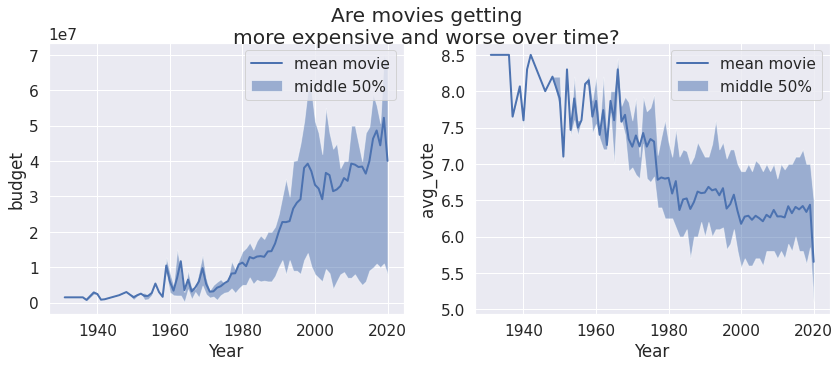

In [64]:
features = ['budget', 'avg_vote']
for idx, feature in enumerate(features):
    # compute mean feature per year
    mean_feat_per_year = df_movie.groupby('year')[feature].mean()
    
    # plot
    plt.subplot(1, 2, idx + 1)
    plt.plot(mean_feat_per_year, lw=2, label='mean movie')
    
    # bonus: shade middle 50% of data
    x = df_movie.groupby('year')[feature].describe().index
    y1 = df_movie.groupby('year')[feature].describe()['25%']
    y2 = df_movie.groupby('year')[feature].describe()['75%']
    plt.fill_between(x, y1, y2, alpha=0.5, label='middle 50%')
    
    plt.xlabel('Year')
    plt.ylabel(feature)
    plt.legend()

plt.gcf().set_size_inches(14, 5)

plt.suptitle('Are movies getting\nmore expensive and worse over time?')

## Part 3.5 (5 points)
Using the [graph built above](https://ibb.co/pj3mWYF), answer the following questions:
1. Roughly, how many times more expensive is an average movie made in 2019 compared to an average movie from 1980?
    - assume that budgets have been adjusted for inflation so no steps need to be taken to compare a dollar from 1980 to a dollar from 2019
1. Average scores appear to fall over time. One explanation is that nowadays average movies are simply worse than they used to be. Think of at least two other distinct reasons why this may be the case (reasons must be plausible though no justification is needed).

### Part 3.5 Solution:
* An average movie from 2019 is roughly 4 times more expensive than one from 1980
* Possible other explanations (variants of):
    * people only rate the movies they watch: there must be a good reason to go back and watch an old movie but we watch new movies as they come
    * bad old movies are not represented in the database, only the worthwhile ones
    * the budgets only appear to be growing because of inflation, whereas people's expectations are also inflating: something that was great five years ago is no longer acceptable